In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
dataset=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [ ]:
print(dataset.shape)
print(dataset.head)

(5572, 5)
<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN   

In [ ]:
dataset = dataset.drop(columns='Unnamed: 2')
dataset = dataset.drop(columns='Unnamed: 3')
dataset = dataset.drop(columns='Unnamed: 4')

In [ ]:
#checking the cleansed data
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#renaming the columns accordingly
dataset = dataset.rename(columns = {'v1':'label','v2':'message'})

In [ ]:
from sklearn import feature_extraction
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(dataset["message"])

In [ ]:


dataset["label"]=dataset["label"].map({'spam':1,'ham':0})
y = dataset['label']

In [ ]:
#Splitting the dataset into testing and training samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
#Creating a Naive Bayes Classifier model
from sklearn import naive_bayes
model = naive_bayes.MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
#Testing the model
y_pred=model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
#Confusion Matrix for Naive Bayes Classifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix obtained: ")
print(cm)

Confusion Matrix obtained: 
[[1178   19]
 [  12  184]]


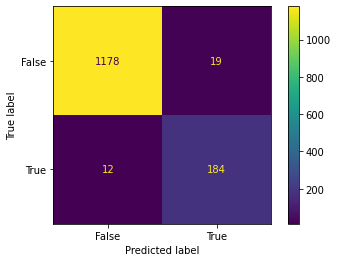

In [ ]:
#Displaying the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =[False,True])
cm_display.plot()
plt.show()


In [ ]:
#Accuracy of Naive Bayes Classifier model
print("Accuracy of Naive Bayes classifier:",metrics.accuracy_score(y_test, y_pred))

Accuracy of Naive Bayes classifier: 0.9777458722182341


In [ ]:
#ROC curve for Naive Bayes Classifier
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area under the curve:",roc_auc)

Area under the curve: 0.961451247165533


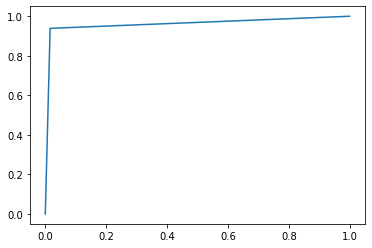

In [ ]:
#Displaying the ROC curve 
plt.plot(false_positive_rate,true_positive_rate)

In [ ]:
#Printing the classification report of Naive Bayes classifier model
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1197
           1       0.91      0.94      0.92       196

    accuracy                           0.98      1393
   macro avg       0.95      0.96      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [ ]:
#Creating a SVC model
from sklearn.svm import SVC
#y_test = np.nan_to_num(y_test)
#x_test = np.nan_to_num(x_test)
svc_model = SVC() #initialize the code module
svc_model.fit(X_train,y_train)

SVC()

In [ ]:
#Testing the model
y_pred1 = svc_model.predict(X_test)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [ ]:
#Confusion Matrix for Support Vector Machine classifier
cm1= confusion_matrix(y_test,y_pred1)
print("Confusion Matrix obtained: ")
print(cm1)

Confusion Matrix obtained: 
[[1197    0]
 [  34  162]]


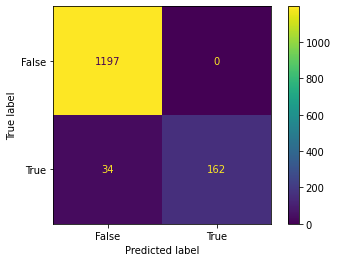

In [ ]:
#Displaying the Confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels =[False,True])
cm_display.plot()
plt.show()

In [ ]:
#Accuracy of Naive Bayes Classifier model
print("Accuracy of Naive Bayes classifier:",metrics.accuracy_score(y_test, y_pred))

Accuracy of Naive Bayes classifier: 0.9777458722182341


In [ ]:
#ROC curve for Naive Bayes Classifier
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area under the curve:",roc_auc)

Area under the curve: 0.961451247165533


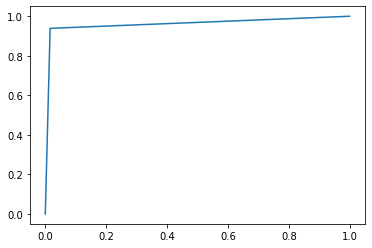

In [ ]:
#Displaying the ROC curve 
plt.plot(false_positive_rate,true_positive_rate)


In [ ]:
#Printing the classification report of SVM classifier model
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1197
           1       1.00      0.83      0.91       196

    accuracy                           0.98      1393
   macro avg       0.99      0.91      0.95      1393
weighted avg       0.98      0.98      0.97      1393



Conclusion:

In this assignment, We have used the Spam SMS Dataset to train and test our model to detect the type of message received based on the message.

We have used 25% of the dataset for testing and the rest for training the model.

After implementing the Naive Bayes Classifier and Support Vector Machine classifier models and comparing their accuracies using the confusion matrix, We observe that both the models have similar accuracies i.e, There are micro changes in their accuracies.

We have also plotted the ROC(Receiver operating characteristic) curve for both the models and we observe that the auc value for the Naive Bayes classifier is greater than the auc value for the SVM classifier. Thus, for spam SMS detection application, it is recommended to use the Naive Bayes Classifier.
